In [70]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Importing the dataset for kmeans and agglomerative with 2 indipendent variable
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

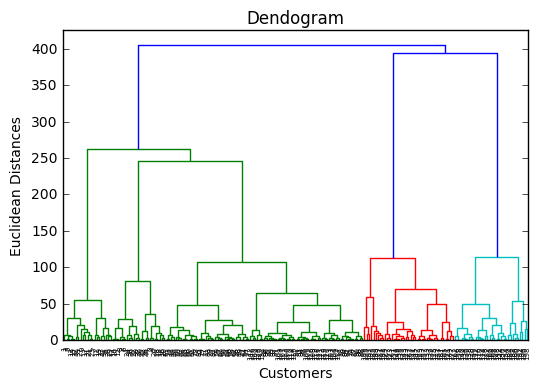

In [72]:
# using the dendogram for optimal number of clustering 
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [73]:
# fitting hierarchical clustering to our dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters= 5,affinity= 'euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

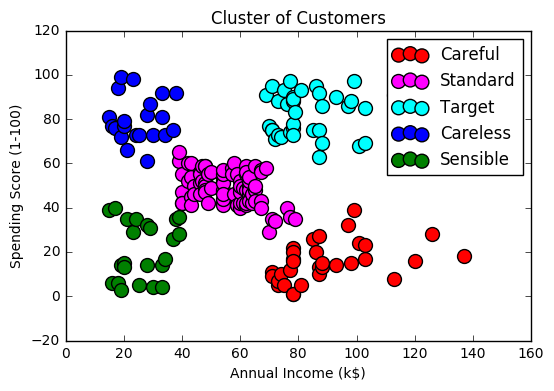

In [74]:
# visualising the clusters 
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s= 100, c='red', label= 'Careful')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s= 100, c='magenta', label= 'Standard')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s= 100, c='cyan', label= 'Target')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s= 100, c='blue', label= 'Careless')
plt.scatter(X[y_hc==4,0], X[y_hc==4,1], s= 100, c='green', label= 'Sensible')
plt.title("Cluster of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

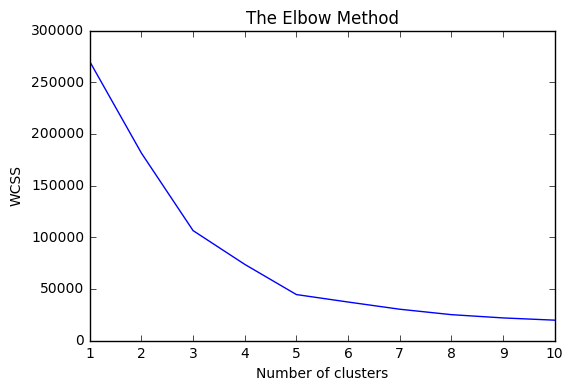

In [75]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

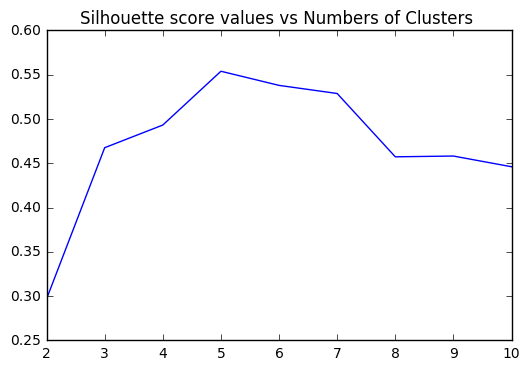

Optimal number of components is:
5


In [76]:
silhouette_score_values=list()
 
NumberOfClusters=range(2,11)
 
for i in NumberOfClusters:
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(X)
    labels= classifier.predict(X)
    #sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

In [77]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

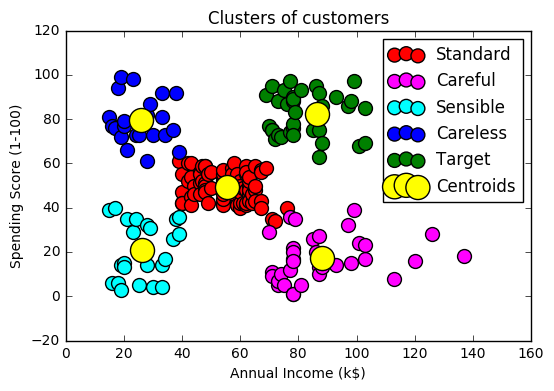

In [78]:
# visualising the clusters
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s= 100, c='red', label= 'Standard')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s= 100, c='magenta', label= 'Careful')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s= 100, c='cyan', label= 'Sensible')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s= 100, c='blue', label= 'Careless')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s= 100, c='green', label= 'Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [79]:
# importing dataset
dataset = pd.read_csv("Wine.csv")
Y = dataset.iloc[:,0:13].values

In [80]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Y= sc.fit_transform(Y)

In [81]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
Y = pca.fit_transform(Y)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.36198848,  0.1920749 ,  0.11123631,  0.0706903 ,  0.06563294,
        0.04935823,  0.04238679,  0.02680749,  0.02222153,  0.01930019,
        0.01736836,  0.01298233,  0.00795215])

In [82]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Y = pca.fit_transform(Y)
explained_variance = pca.explained_variance_ratio_

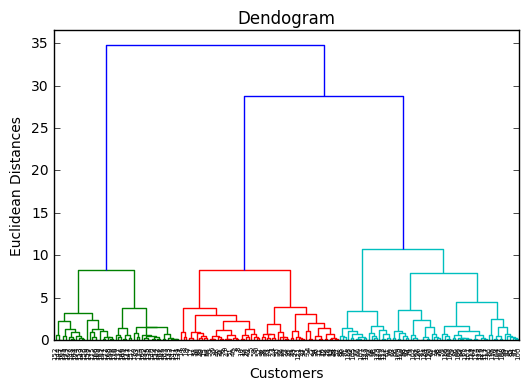

In [90]:
# using the dendogram for optimal number of clustering 
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(Y,method = "ward"))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [84]:
# fitting hierarchical clustering to our dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters= 3,affinity= 'euclidean',linkage='ward')
y_hc = hc.fit_predict(Y)

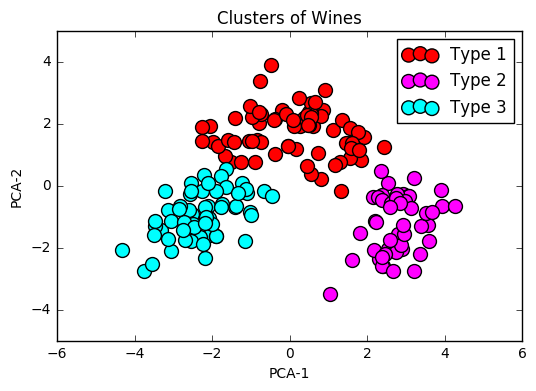

In [85]:
# visualising the clusters 
plt.scatter(Y[y_hc==0,0], Y[y_hc==0,1], s= 100, c='red', label= 'Type 1')
plt.scatter(Y[y_hc==1,0], Y[y_hc==1,1], s= 100, c='magenta', label= 'Type 2')
plt.scatter(Y[y_hc==2,0], Y[y_hc==2,1], s= 100, c='cyan', label= 'Type 3')
plt.title("Clusters of Wines")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.legend()
plt.show()

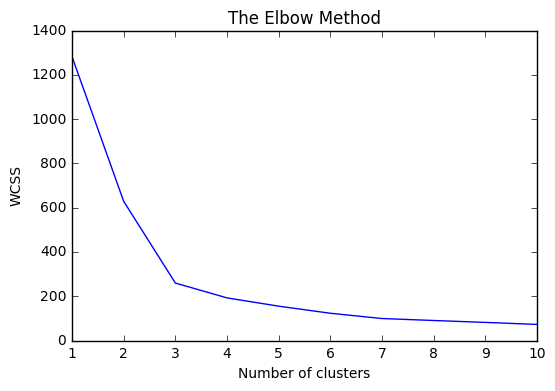

In [86]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

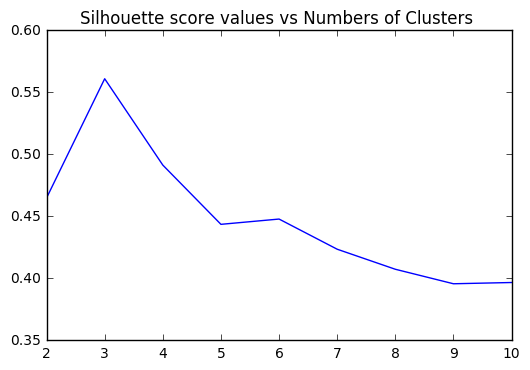

Optimal number of components is:
3


In [87]:
silhouette_score_values=list()
 
NumberOfClusters=range(2,11)
 
for i in NumberOfClusters:
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(Y)
    labels= classifier.predict(Y)
    #sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(Y,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)

In [88]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

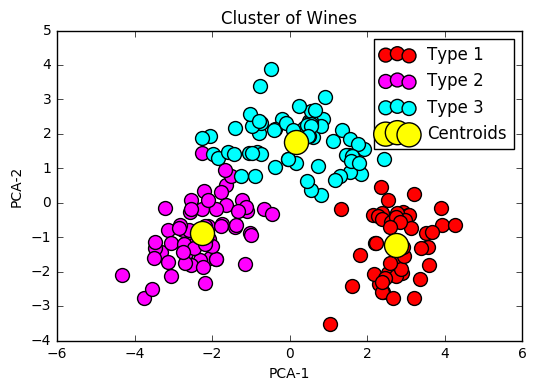

In [89]:
# visualising the clusters
plt.scatter(Y[y_kmeans==0,0], Y[y_kmeans==0,1], s= 100, c='red', label= 'Type 1')
plt.scatter(Y[y_kmeans==1,0], Y[y_kmeans==1,1], s= 100, c='magenta', label= 'Type 2')
plt.scatter(Y[y_kmeans==2,0], Y[y_kmeans==2,1], s= 100, c='cyan', label= 'Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Wines')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.legend()
plt.show()